## This notebook is a clean version of a submission my team and I made at the deepflow Machine Learning Hackathon at ESPRIT
## 
### The competition requires a simple regression model to predict the energy usage of a building based on energy related factors
### This competition was particularly tricky because a simple formula between 3 features can give us the target.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
s = pd.read_csv('SampleSubmission.csv')
df = pd.read_csv('train.csv')
test = pd.read_csv('Test.csv')
df

,building,File,Cooling Setpoint,EUI,Cooling COP,Operating Hours,WWR,Equipment Heat Gain,Internal Wall Rt,Internal Floor Rt,Infiltration,Ground Floor Rt,Number of Floors,Occupancy,Light Heat Gain,Windows Rt,Height,Heating COP,Heating Setpoint,Town,Wall Rt,Start Time,windows g-value,Roof Rt,Boiler Efficiency,Internal Mass,Permeability,Total Floors Area,random load mesures,Operational Energy
0,Building_0,Shape0_10851,26.804565,37.155511,4.430542,12.166667,"(0.771636962890625,0.436004638671875,0.5746520...",15.463379,2.511920,1.919918,0.210,3.445636,5,23.231812,7.946655,1.147765,3.351489,2.927368,19.373901,1,4.640045,8.778931,0.381354,2.912090,0.921890,44.441528,3.942261,18210.25,"{'Cooling': '6743.0007375945:C', 'Lights': '10...",135322.229618
1,Building_10,Shape0_11866,25.219604,64.131327,2.855347,9.166667,"(0.451275634765625,0.061151123046875,0.2780212...",11.646973,2.080851,2.822443,0.222,3.484326,5,19.027710,4.105835,1.062551,4.118481,2.891235,20.949097,0,3.621094,8.131470,0.556696,4.019824,0.908726,41.702271,5.122925,13110.25,"{'Cooling': '6485.8495970786:C', 'Lights': '31...",168155.546796
2,Building_10001,Shape0_15816,26.691040,31.992473,2.863892,10.166667,"(0.324163818359375,0.669464111328125,0.6951721...",9.899902,2.274071,2.341140,0.221,5.081571,4,20.664673,4.587036,1.162571,3.247339,3.647339,19.816528,1,4.595792,7.406128,0.572552,5.745949,0.911157,24.244995,4.495239,13561.60,"{'Cooling': '3861.976104307:C', 'Lights': '486...",108467.281862
3,Building_10002,Shape0_15566,25.468384,40.932114,3.922485,10.333333,"(0.772406005859375,0.924346923828125,0.5703674...",12.196777,2.541613,2.390324,0.245,3.329946,5,19.004517,6.005005,1.176192,3.699683,3.643433,20.390747,1,5.310859,7.831909,0.520404,4.394614,0.929751,24.655151,6.311646,21678.00,"{'Cooling': '10788.0922449597:C', 'Lights': '7...",177465.271945
4,Building_10003,Shape0_3155,25.152832,57.792356,2.828613,10.833333,"(0.3538818359375,0.2387451171875,0.07746582031...",12.552734,1.586183,2.228146,0.313,3.493092,4,18.679199,5.554199,1.149819,3.442090,4.364746,20.411621,2,4.190710,8.794434,0.475854,5.271557,0.947480,29.201660,7.530762,14200.16,"{'Cooling': '4314.2210067885:C', 'Lights': '59...",205165.175932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54595,Building_9992,Shape0_14205,25.408325,63.043619,3.872192,10.333333,"(0.889080810546875,0.498736572265625,0.2994445...",9.901855,2.779069,1.589646,0.262,6.199955,4,24.426880,9.566040,1.006061,3.915015,4.105835,19.736938,0,5.896495,8.347046,0.409735,5.934082,0.924028,23.314819,6.210571,11026.24,"{'Cooling': '4817.8812345313:C', 'Lights': '86...",173783.517217
54596,Building_9993,Shape0_20612,25.150330,52.031822,2.593689,13.000000,"(0.735739135742188,0.707504272460938,0.3488006...",10.283936,1.890247,1.951719,0.214,4.237862,4,15.292664,6.426331,1.185035,3.464612,2.926453,20.020447,1,4.930336,8.463562,0.529129,5.935157,0.926541,32.026062,4.032898,13899.20,"{'Cooling': '8970.7636194456:C', 'Lights': '86...",180800.175570
54597,Building_9994,Shape0_12286,26.598511,64.868078,3.460815,14.333333,"(0.435455322265625,0.242205810546875,0.3606384...",8.287598,2.565733,2.496305,0.298,3.153802,4,22.640991,4.820679,1.048838,3.600513,3.449829,19.695190,2,3.282183,8.393188,0.476422,4.655868,0.969507,18.088989,7.244019,13344.80,"{'Cooling': '2182.6635332645:C', 'Lights': '65...",216412.881062
54598,Building_9995,Shape0_10572,25.040894,45.606632,4.498901,9.333333,"(0.902593994140625,0.523016357421875,0.3628356...",9.830566,1.811888,1.637205,0.214,3.045919,5,24.218140,8.292358,1.107903,3.411255,2.644165,19.348511,2,4.140929,8.894165,0.524615,5.439936,0.926499,39.080200,4.815308,21601.00,"{'Cooling': '10687.6493568836:C', 'Lights': '1...",197029.771099


## Exploratory Data Analysis

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54600 entries, 0 to 54599
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   building             54600 non-null  object 
 1   File                 54600 non-null  object 
 2   Cooling Setpoint     54600 non-null  float64
 3   EUI                  54600 non-null  float64
 4   Cooling COP          54600 non-null  float64
 5   Operating Hours      54600 non-null  float64
 6   WWR                  54600 non-null  object 
 7   Equipment Heat Gain  54600 non-null  float64
 8   Internal Wall Rt     54600 non-null  float64
 9   Internal Floor Rt    54600 non-null  float64
 10  Infiltration         54600 non-null  float64
 11  Ground Floor Rt      54600 non-null  float64
 12  Number of Floors     54600 non-null  int64  
 13  Occupancy            54600 non-null  float64
 14  Light Heat Gain      54600 non-null  float64
 15  Windows Rt           54600 non-null 

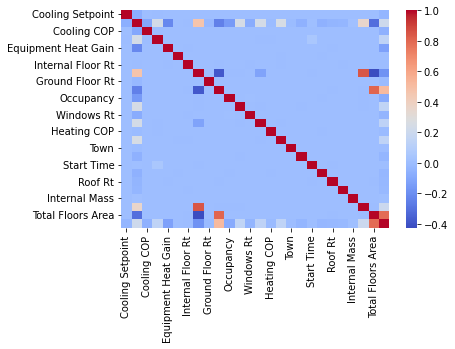

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()  # assuming 'df' is your pandas DataFrame
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

### We can see there is a high correlation between 'Total Floors Area' and our target value 'Operational Energy'
### And by reading the description of the following features we can find the value of the target :
#### - 'EUI': Energy use intensity, a measure of a building's energy use per unit area.
#### - 'Total Floors Area': The total area of the floors within the building.
#
### Let's first plot df['EUI'] * df['Total Floors Area'] and the target value

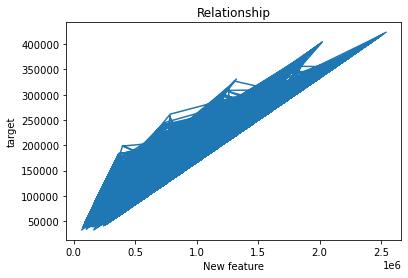

In [59]:
plt.plot(df['EUI']*df['Total Floors Area'], df['Operational Energy'])
plt.xlabel('New feature')
plt.ylabel('target')
plt.title('Relationship')
plt.show()

#### There is a resemblance of a linear relationship. And the graph seems to have 5 heads 

In [60]:
df['Number of Floors'].value_counts()

5    18204
4    13221
6    11571
3     8331
2     3273
Name: Number of Floors, dtype: int64

### Number of floors is a categorical feature with 5 possible values so let's try dividing our new feature with the number of floors to test whether the target value is actually the energy usage per floor

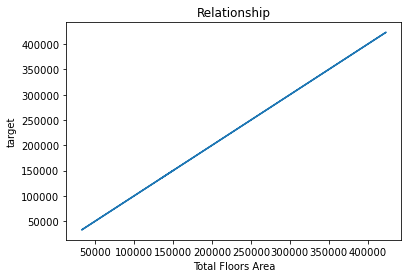

In [61]:
plt.plot(df['EUI']*df['Total Floors Area']/df['Number of Floors'], df['Operational Energy'])
plt.xlabel('Total Floors Area')
plt.ylabel('target')
plt.title('Relationship')
plt.show()

## A perfect linear relationship !!
#### Let's create a new column for our new feature and drop the other features that are now pretty much useless

In [62]:
# create new feature
df['feature'] = df['EUI']*df['Total Floors Area']/df['Number of Floors']

# get rid of all the other features
df = df[['feature','Operational Energy']]
df

,feature,Operational Energy
0,135322.229618,135322.229618
1,168155.546796,168155.546796
2,108467.281862,108467.281862
3,177465.271945,177465.271945
4,205165.175932,205165.175932
...,...,...
54595,173783.517217,173783.517217
54596,180800.175570,180800.175570
54597,216412.881062,216412.881062
54598,197029.771099,197029.771099


## No need for a model just submit the new feature as prediction

# Test Set 

In [63]:
#format the submission as requested
test['submission id'] = test['building']+"_Town_"+test["Town"].astype(str)

#our prediction column
test['Operational Energy'] = test['EUI'] * test['Total Floors Area'] / test['Number of Floors']

#removing all else
test = test[['submission id','Operational Energy']]

In [64]:
test

,submission id,Operational Energy
0,Building_1_Town_1,73062.463419
1,Building_100_Town_1,106643.525899
2,Building_1000_Town_2,88718.965742
3,Building_10000_Town_0,344952.564115
4,Building_10005_Town_2,240320.078745
...,...,...
23395,Building_9989_Town_1,137798.432175
23396,Building_999_Town_2,115597.079636
23397,Building_9996_Town_0,228667.954423
23398,Building_9997_Town_1,60061.918062


In [65]:
#csv file before submission

test.to_csv('sub.csv', index=False)